In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv("")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FDA_Dataset_A3/loan_data_training.csv'

In [ ]:
target_distribution =  data['TARGET'].value_counts(normalize=True)
print(target_distribution)

In [ ]:
#identifying missing values
missing_values = data.isna().sum()
print("Missing values by column:")
print(missing_values[missing_values > 0])

In [ ]:
data.hist(figsize=(30,30))
plt.show()

In [ ]:
#data cleaning process to check corelation with TARGET column
Source= data[['NAME_TYPE_SUITE','EXT_SOURCE_3','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']]
source_corr = Source.corr()

ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [ ]:
#data drop based on corelation through heatmap and histogram visuals
data= data.drop(['EXT_SOURCE_3','FLAG_MOBIL'],axis=1)
#multiple columns of FLAG_DOCUMENT and AMT_REQ_CREDIT_BUREAU_*
data= data.drop([ 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'],axis=1)

In [ ]:
#based on histogram diagram removing employee values that are positive
data = data[data['DAYS_EMPLOYED'] <= 0]

data['DAYS_EMPLOYED'].describe()

In [ ]:
# Identifying datatypes of column as  numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_distribution = data[categorical_cols].nunique()
#median for numeric values
median_values = data[numerical_cols].median()

# using median  for missing value
data[numerical_cols] = data[numerical_cols].fillna(median_values)

In [ ]:
#checking mising values
data.isnull().sum()

In [ ]:
data= data.dropna(subset=['NAME_TYPE_SUITE'])

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

In [ ]:
label_encoder = LabelEncoder()
data['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER'] = label_encoder.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR'] = label_encoder.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY'] = label_encoder.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE'] = label_encoder.fit_transform(data['NAME_TYPE_SUITE'])
data['NAME_INCOME_TYPE'] = label_encoder.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(data['NAME_HOUSING_TYPE'])
data['WEEKDAY_APPR_PROCESS_START'] = label_encoder.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE'] = label_encoder.fit_transform(data['ORGANIZATION_TYPE'])

In [ ]:
from sklearn.utils import resample


print("BEFORE" , data["TARGET"].value_counts())

sam_data = data.copy()
df_major = sam_data [ sam_data["TARGET"] == 0]
df_minor = sam_data [ sam_data["TARGET"] == 1]

df_minor_upsampling = resample(df_minor, replace = True,
                               n_samples = len(df_major), random_state =23)

data = pd.concat([df_major, df_minor_upsampling])

print(data["TARGET"].value_counts())

In [ ]:
X = data.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = data['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#from sklearn.impute import SimpleImputer

# Initialize the imputer with mean
#imputer = SimpleImputer(strategy='mean')

#X_train = imputer.fit_transform(X_train)

#X_test = imputer.transform(X_test)

# i tried using imputer to fill missing value but was further affecting my accuracy and classifiers in training.#

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#adding hyperparameters to get better accuracy than 62% which was with no parameters
rf_model = RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300, random_state=42)
# max_depth=30: Maximum depth of the decision tree in each random forest
# min_samples_leaf=2: Minimum number of samples required for leaf node.
# min_samples_split=10: Minimum number of samples required to split an internal node.
# n_estimators=300: The number of decision trees in the random forest.
# random_state=42: Set a random seed for reproducibility.
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Classifier Accuracy:", accuracy)

print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, auc

#defining the values of y_test and y_pred to confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, y_rf_pred)

#to handle imblance in dataset we calculate f1_score
f1_rf= f1_score(y_test,y_rf_pred)

#displaying Confusion matrix
disp_rf= ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix)
disp_rf.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [3]:
#random forest classifier ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
#false positive and true positive rate to calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)


roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

NameError: name 'rf_model' is not defined

In [4]:
#decsion tree classifier
from sklearn.tree import DecisionTreeClassifier
#adding hyper parameters to get higher accuracy
# 'entropy' is used for information gain- criterion
# Max Depth: 7 limits the depth of the tree
# Min Samples Leaf: 2 minimum number of samples required to be a leaf node
# Min Samples Split: 2  minimum number of samples required to split an internal node

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, y_dt_pred))


#defining the values of y_test and y_pred to confusion matrix
dt_confusion_matrix = confusion_matrix(y_test, y_dt_pred)


f1_dt= f1_score(y_test,y_dt_pred)



#displaying Confusion matrix
disp_dt= ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix)
disp_dt.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


NameError: name 'X_train' is not defined

In [6]:
#Decision tree classifier ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


y_pred_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt= roc_auc_score(y_test, y_pred_prob_dt)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


NameError: name 'X_train' is not defined

Support Vector Classifier Accuracy: 0.6542133665421337
Classification Report for SVM Classifier:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      3626
           1       0.66      0.64      0.65      3601

    accuracy                           0.65      7227
   macro avg       0.65      0.65      0.65      7227
weighted avg       0.65      0.65      0.65      7227



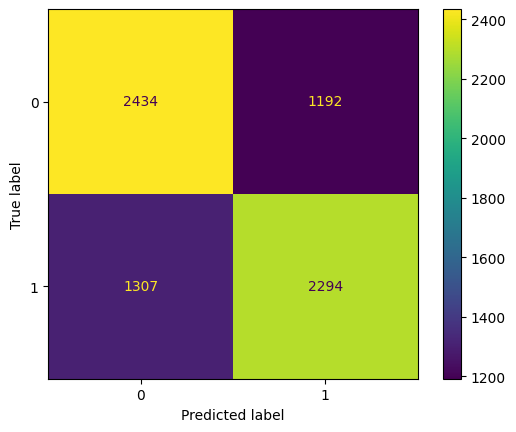

In [48]:
#Support vector machine-svM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',random_state=42,probability= True)   #Linear Kernel
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_svm_pred)

print ("Support Vector Classifier Accuracy:",accuracy_svm)

print("Classification Report for SVM Classifier:\n", classification_report(y_test, y_svm_pred))

#defining the values of y_test and y_pred to confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, y_svm_pred)


f1_svm= f1_score(y_test,y_svm_pred)

#displaying Confusion matrix
disp_svm= ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix)
disp_svm.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



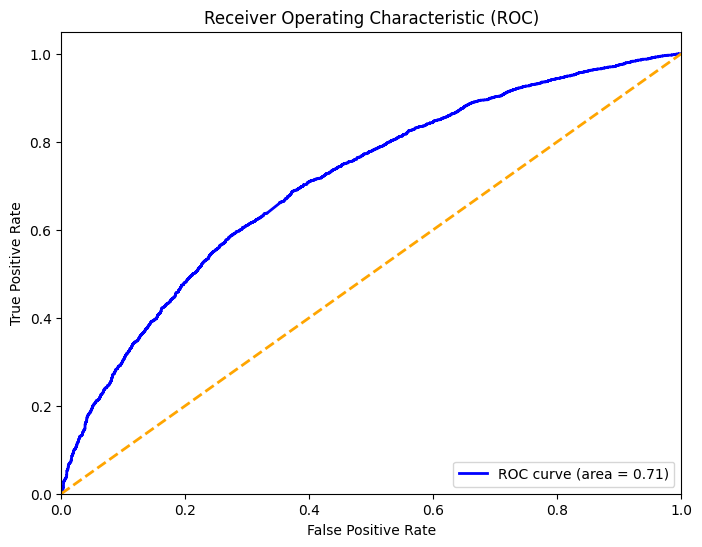

In [50]:
# SVC ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

y_pred_prob = svm_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


KNN Classifier Accuracy: 0.7016742770167428
Classification Report for KNN Classifier:
               precision    recall  f1-score   support

           0       0.78      0.56      0.65      3626
           1       0.66      0.84      0.74      3601

    accuracy                           0.70      7227
   macro avg       0.72      0.70      0.70      7227
weighted avg       0.72      0.70      0.70      7227



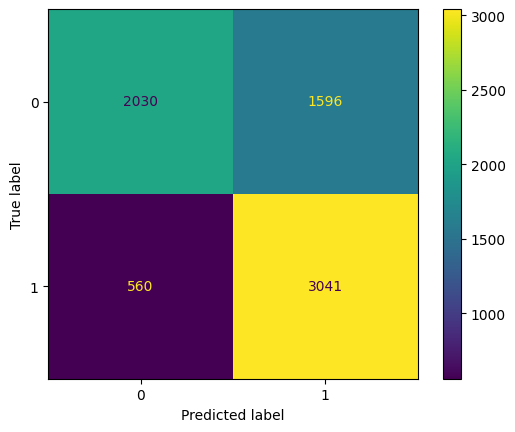

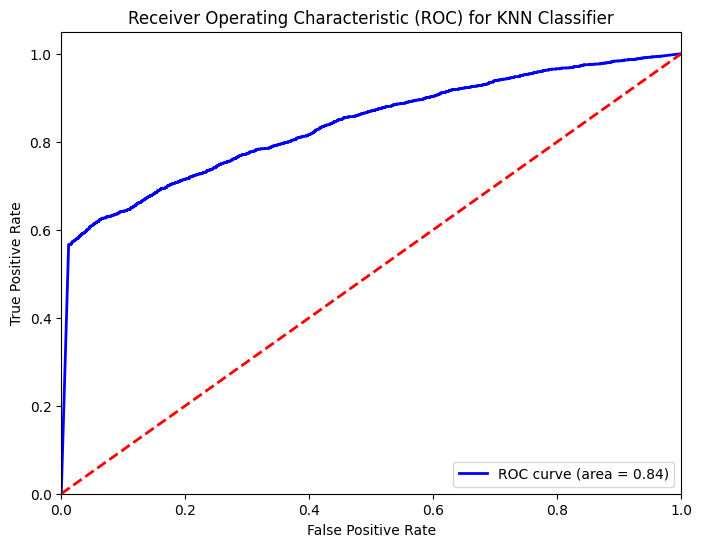

In [51]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#3 specified number of neighbors were used but were changed to get better accuracy
knn_model = KNeighborsClassifier(n_neighbors=9, weights = 'distance', metric = 'manhattan', p= 1)
# n_neighbors=9: Use 9 nearest neighbors to make predictions, controlling the balance between bias and variance.
# weights='distance': Give more weight to closer neighbors, emphasizing local data structure.
# metric='manhattan': Use the Manhattan distance metric for measuring data point distances.
# p=1: Equivalent to using the 'manhattan' distance metric

knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_knn_pred)
print("KNN Classifier Accuracy:", accuracy_knn)

print("Classification Report for KNN Classifier:\n", classification_report(y_test, y_knn_pred))

#defining the values of y_test and y_pred to confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, y_knn_pred)

f1_knn= f1_score(y_test,y_knn_pred)

#displaying Confusion matrix
disp_knn= ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix)
disp_knn.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# KNN ROC curve
print("\n")

y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN Classifier')
plt.legend(loc='lower right')
plt.show()


MLP Accuracy: 0.6912965269129653
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.67      3626
           1       0.67      0.74      0.71      3601

    accuracy                           0.69      7227
   macro avg       0.69      0.69      0.69      7227
weighted avg       0.69      0.69      0.69      7227

Confusion Matrix:
 [[2314 1312]
 [ 919 2682]]


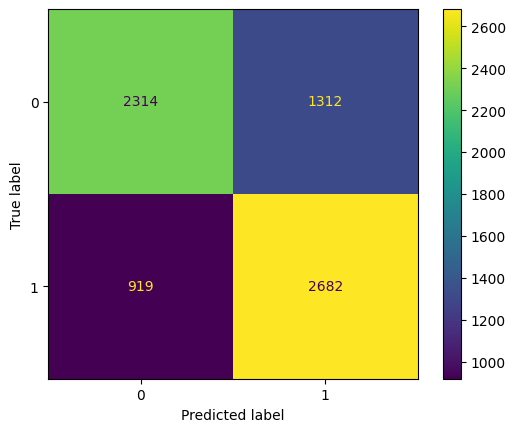

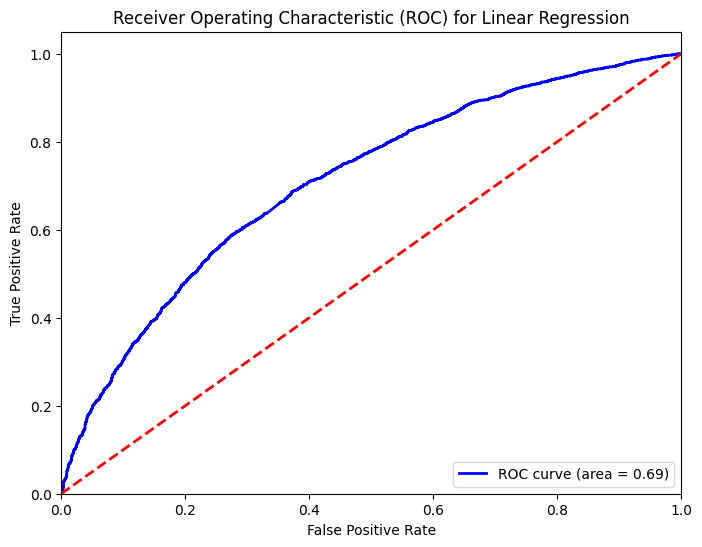

In [52]:
#Neural Networks using MLP classifier
from sklearn.neural_network import MLPClassifier


mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
#hidden_layer_sizes=(100, 50): with two hidden layers, containing 100 and 50 neurons, respectively.
# max_iter=1000: Maximum number of iterations for the solver to converge.
mlp_model.fit(X_train, y_train)
y_mlp_pred = mlp_model.predict(X_test)

accuracy = accuracy_score(y_test, y_mlp_pred)
print("MLP Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_mlp_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_mlp_pred))

#defining the values of y_test and y_pred to confusion matrix
mlp_confusion_matrix = confusion_matrix(y_test, y_mlp_pred)

f1_mlp= f1_score(y_test,y_mlp_pred)

#displaying Confusion matrix
disp_mlp= ConfusionMatrixDisplay(confusion_matrix=mlp_confusion_matrix)
disp_mlp.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\n")
#Neural Networks ROC curve

fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_mlp_pred)
roc_auc_mlp = roc_auc_score(y_test, y_mlp_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Linear Regression')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from IPython.core.display import ProgressBar
models= [rf_model,dt_model,svm_model,knn_model,mlp_model]
prob_scores = [y_pred_prob_rf, y_pred_prob_dt,y_pred_prob,y_pred_prob_knn,y_mlp_pred]

In [ ]:
len(prob_scores)

In [ ]:
Model_names=['Random Fores','Decision Tree','Support Vector Machine','KNN','MLP']

In [ ]:
from sklearn.metrics import roc_curve, auc

y_true = y_test

plt.figure(figsize=(10,8))
for name, scores in zip( Model_names, prob_scores):
  fpr , tpr, threshold = roc_curve(y_true, scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label = f"{name} (area = {roc_auc:.2f})")

plt.plot([0,1],[0,1], 'k--') # Random Classifier line that passes through the diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(' False Positive Rate')
plt.ylabel(' True positive Rate')
plt.title( ' Receiver Operating Characteristics (ROC) curve')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
#Load the unknown dataset
unknown_data = pd.read_csv('/content/drive/MyDrive/FDA_Dataset_A3/loan_data_unknown.csv')

In [ ]:
unknown_data.info()

In [ ]:
#identifying missing values
missing_values = unknown_data.isna().sum()
print("Missing values by column:")
print(missing_values[missing_values > 0])

In [ ]:
#data drop based on corelation
unknown_data= unknown_data.drop(['EXT_SOURCE_3','FLAG_MOBIL'],axis=1)
#multiple columns of FLAG_DOCUMENT
unknown_data= unknown_data.drop([ 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1)

In [ ]:
#unknown is written before every variable to differentiate it from training dataset.
# Identifying datatypes of column as  numerical and categorical columns
unknown_numerical_cols = unknown_data.select_dtypes(include=['float64', 'int64']).columns
unknown_categorical_cols = unknown_data.select_dtypes(include=['object']).columns

unknown_categorical_distribution = unknown_data[categorical_cols].nunique()
#median for numeric values
unknown_median_values = unknown_data[unknown_numerical_cols].median()

# using median  for missing value
unknown_data[unknown_numerical_cols] = unknown_data[unknown_numerical_cols].fillna(unknown_median_values)


In [ ]:
#checking mising values
data.isnull().sum()

In [ ]:
unknown_data.info()

In [ ]:
# List of categorical columns to encode
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                      'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                      'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

for column in categorical_columns:
    if 'Unknown' in unknown_data[column].unique():
        # Encoding the column and excluding 'Unknown'
        unknown_data[column] = label_encoder.transform(unknown_data[column][unknown_data[column] != 'Unknown'])

for column in categorical_columns:
    if 'Unknown' in unknown_data[column].unique():
        unknown_data[column] = unknown_data[column].apply(lambda x: label_encoder.transform([x])[0] if x != 'Unknown' else -1)


In [ ]:
unknown_data.head(10)

In [ ]:
data.head(10)